### modules

In [3]:
# data process
import cv2
import random
import urllib
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
from matplotlib import rc 
import matplotlib.pyplot as plt
rc("font", family="Malgun Gothic ") # Windows : Malgun Gothic 
get_ipython().run_line_magic("matplotlib", "inline")

# ingnore warning
import warnings
warnings.filterwarnings('ignore')

# 1. Preprocessing

In [3]:
data = pd.read_csv('./data/zzimcong.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405150 entries, 0 to 405149
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    405150 non-null  int64  
 1   name                  404903 non-null  object 
 2   brand_id              405150 non-null  int64  
 3   brand_name            405150 non-null  object 
 4   parent_category_id    390674 non-null  float64
 5   parent_category_name  390674 non-null  object 
 6   category_id           390674 non-null  float64
 7   category_id.1         390674 non-null  object 
 8   price                 405150 non-null  int64  
 9   image_url             405150 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 30.9+ MB


In [4]:
data.isnull().sum() # 결측치의 수

id                          0
name                      247
brand_id                    0
brand_name                  0
parent_category_id      14476
parent_category_name    14476
category_id             14476
category_id.1           14476
price                       0
image_url                   0
dtype: int64

In [5]:
data = data.dropna() # 결측치 제거
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390569 entries, 0 to 405149
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    390569 non-null  int64  
 1   name                  390569 non-null  object 
 2   brand_id              390569 non-null  int64  
 3   brand_name            390569 non-null  object 
 4   parent_category_id    390569 non-null  float64
 5   parent_category_name  390569 non-null  object 
 6   category_id           390569 non-null  float64
 7   category_id.1         390569 non-null  object 
 8   price                 390569 non-null  int64  
 9   image_url             390569 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ MB


In [6]:
data.tail(2)

,id,name,brand_id,brand_name,parent_category_id,parent_category_name,category_id,category_id.1,price,image_url
405148,4213458,★오늘출발 세일상품★메리 귀마개 크리스마스 선물세트(FREE),108,꼬마옴므,3.0,잡화,20.0,기타잡화,6720,https://shopping-phinf.pstatic.net/main_836582...
405149,4213459,임부복*톡톡해요 임산부맨투맨,1041,소임,2.0,의류,46.0,임산부의류,19800,https://www.soim.co.kr/shopimages/ebbda12/0680...


In [7]:
# columns 출력

for idx, col in enumerate(data.columns):
    print(idx, col)

0 id
1 name
2 brand_id
3 brand_name
4 parent_category_id
5 parent_category_name
6 category_id
7 category_id.1
8 price
9 image_url


In [9]:
# data.to_csv('./data/zzimcong_prep.csv')

# 2. EDA
- 브랜드, 카테고리, 가격 분포 시각화

In [50]:
# preprocessed data load
data = pd.read_csv('./data/zzimcong_prep.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390569 entries, 0 to 390568
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            390569 non-null  int64  
 1   id                    390569 non-null  int64  
 2   name                  390569 non-null  object 
 3   brand_id              390569 non-null  int64  
 4   brand_name            390569 non-null  object 
 5   parent_category_id    390569 non-null  float64
 6   parent_category_name  390569 non-null  object 
 7   category_id           390569 non-null  float64
 8   category_id.1         390569 non-null  object 
 9   price                 390569 non-null  int64  
 10  image_url             390569 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 32.8+ MB


#### Brand

In [51]:
data['brand_name'].value_counts()

맘맘베이비    46772
베이비샵     18252
키키베베     10912
반해쮸      10681
도노베베      9501
         ...  
벤브와          3
보니           2
보르르          1
타이니코튼        1
프롬유          1
Name: brand_name, Length: 671, dtype: int64

In [52]:
data['brand_name'].value_counts().head(15).index

Index(['맘맘베이비', '베이비샵', '키키베베', '반해쮸', '도노베베', '더쥬니엘', '더권키즈', '퍼스트마마', '캐리마켓',
       '베이비꼬임', '모두베베', '뽐키즈', '미키몰', '홀릭메이드', '돌핀웨일'],
      dtype='object')

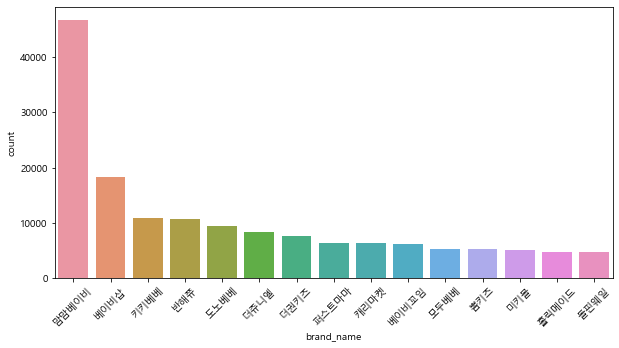

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data['brand_name'], 
              order=data['brand_name'].value_counts().head(15).index)
plt.xticks(rotation=45)
plt.show();

- 총 671개의 브랜드 존재
- 그 중 맘맘베이비의 상품 수가 46722개로 압도적으로 많음, 다음으로 베이비샾, 키키베베, 반해쮸 등등   

#### Category

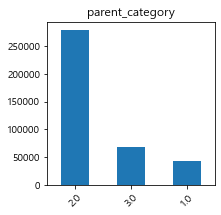

In [48]:
data['parent_category_id'].value_counts().plot(kind='bar', figsize=(3,3), title = 'parent_category')
plt.xticks(rotation=45);

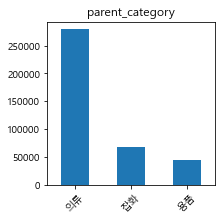

In [49]:
data['parent_category_name'].value_counts().plot(kind='bar', figsize=(3,3), title = 'parent_category')
plt.xticks(rotation=45);

- parent category의 경우 의료가 대부분을 차지하고 다음으로 잡화, 용품

In [54]:
len(data['category_id'].value_counts()) # 하위카테고리의 수

36

In [55]:
data['category_id.1'].value_counts().index # 하위카테고리 이름

Index(['상의', '바지', '아우터', '원피스', '상하복/세트', '내의/속옷', '신생아의류', '신발', '모자',
       '장난감/완구', '양말/타이즈', '헤어ACC', '임산부의류', '기타잡화', '이유/수유용품', '유아침구', '가방',
       '치마', '가구/리빙', '목도리/장갑', '한복', '외출용품', '교구/도서', '수영복', '인테리어소품',
       '시즌의류/기타', '파티/촬영소품', '생활용품', '신생아용품', '주얼리', '스킨/바디용품', '패밀리룩',
       '위생/건강용품', '기타용품', '우비/우산', '안경/선글라스'],
      dtype='object')

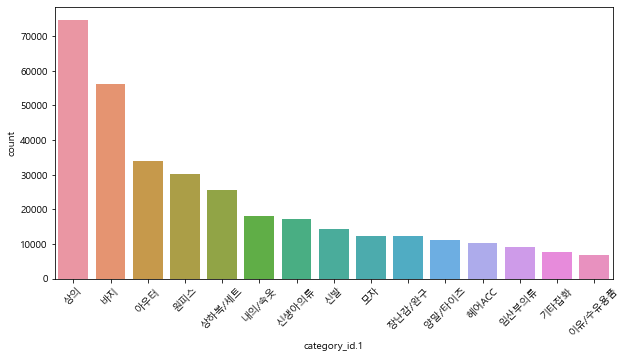

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(data['category_id.1'], 
              order=data['category_id.1'].value_counts().head(15).index)
plt.xticks(rotation=45)
plt.show();

- 하위 카테고리의 경우 총 36개의 클래스가 존재하고 상의, 바지, 아우터, 원피스 순으로 많다

#### Price

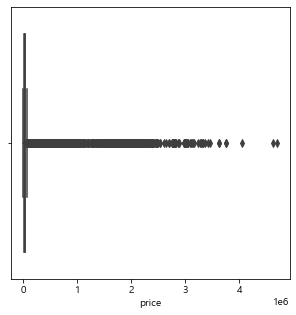

In [57]:
plt.figure(figsize=(5,5))
sns.boxplot(x = data['price'])
plt.show();

- 전체 상품 Price boxplot

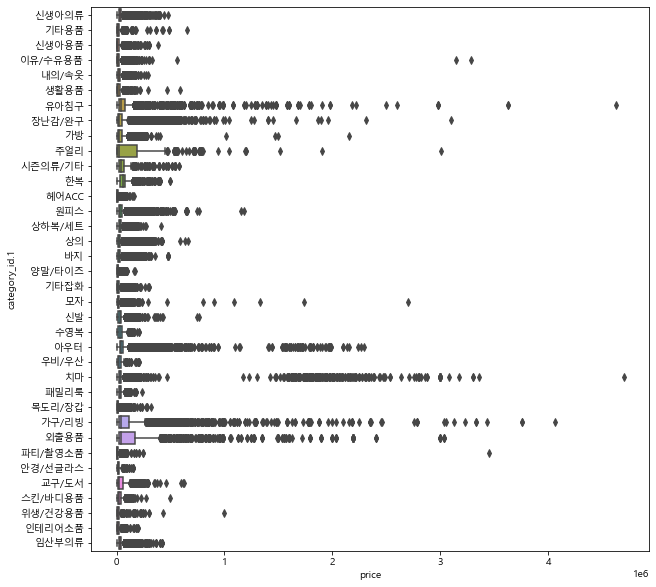

In [58]:
plt.figure(figsize=(10,10))
sns.boxplot(x = data['price'], y=data['category_id.1'])
plt.show();

- 카테고리 별로 가격 분포

In [59]:
data['price'].sort_values()

280015          0
280014          0
280017          0
280013          0
280012          0
           ...   
165532    3760000
201581    3760000
113444    4060000
348446    4630000
296369    4700000
Name: price, Length: 390569, dtype: int64

In [60]:
# IQR 구하기

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
Q2 = data['price'].median()

IQR = Q3 - Q1
IQR

23600.0

In [61]:
# 이상치 데이터 구하기
outdata1 = data[data['price']<(Q1 - 1.5 * IQR)]
outdata2 = data[data['price']>(Q3 + 1.5 * IQR)]

len(outdata1), len(outdata2)

(0, 31921)

- loswer fence를 넘어서는 이상치는 존재하지 않고 upper fence를 넘어서는(비싼) 이상치는 31921개 존재

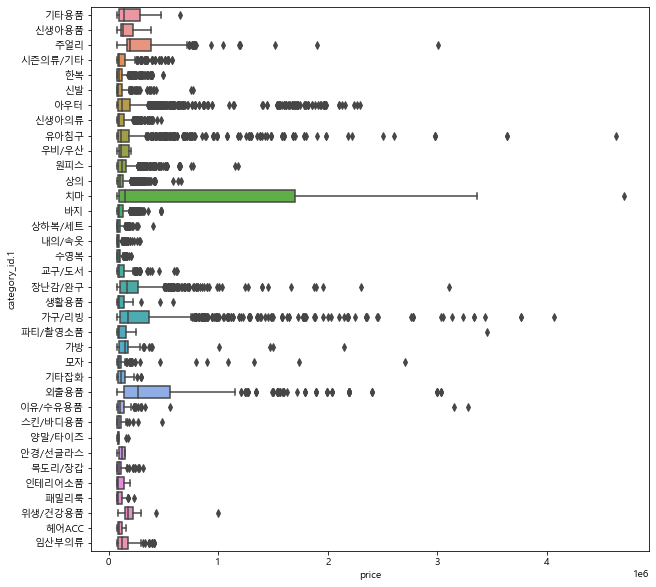

In [62]:
plt.figure(figsize=(10,10))
sns.boxplot(x = outdata2['price'], y=outdata2['category_id.1'])
plt.show();

- upper fence를 넘어서는 이상치들만 boxplot해본 결과 
- 치마가 특히 비싼 경우가 많음, 다음으로 외출용품, 주얼리, 가구/리빙, 장난감 등
- 이상치까지 포함하여 생각하면 주얼리, 아우터, 유아침구, 장난감/완구, 가구/리빙, 외출용품이 비싼 상품들 존재

In [63]:
data_in = data[data['price']<(Q3 + 1.5 * IQR)]

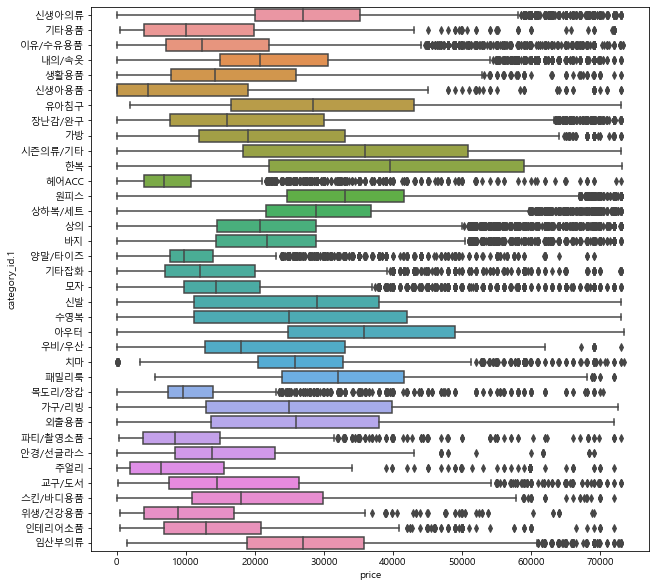

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(x = data_in['price'], y=data_in['category_id.1'])
plt.show();

- 이상치 제거한 데이터만 봤을 때 0~70000원 사이 가격대
- 한복이 특히 비싼 경우 많음

In [65]:
main_brand = data['brand_name'].value_counts().head(15)
print(main_brand)
main_brand.index

맘맘베이비    46772
베이비샵     18252
키키베베     10912
반해쮸      10681
도노베베      9501
더쥬니엘      8361
더권키즈      7661
퍼스트마마     6471
캐리마켓      6464
베이비꼬임     6226
모두베베      5401
뽐키즈       5392
미키몰       5143
홀릭메이드     4861
돌핀웨일      4764
Name: brand_name, dtype: int64


Index(['맘맘베이비', '베이비샵', '키키베베', '반해쮸', '도노베베', '더쥬니엘', '더권키즈', '퍼스트마마', '캐리마켓',
       '베이비꼬임', '모두베베', '뽐키즈', '미키몰', '홀릭메이드', '돌핀웨일'],
      dtype='object')

In [66]:
print(f'총합: {main_brand.values.sum()}')

총합: 156862


In [67]:
# 상위 15개 브랜드 데이터만 뽑아내서 main_brand_data에 입력

main_brand_data = []
for i, d in data.iterrows():
    if d['brand_name'] in main_brand.index:
        main_brand_data.append(d)

In [68]:
main_brand_data = pd.DataFrame(main_brand_data)

In [69]:
main_brand_data.tail(2)

,Unnamed: 0,id,name,brand_id,brand_name,parent_category_id,parent_category_name,category_id,category_id.1,price,image_url
390380,404941,4212417,JU 스마일털워커,131,도노베베,3.0,잡화,21.0,신발,25600,https://shopping-phinf.pstatic.net/main_835355...
390381,404942,4212418,[반다나] 하트 골덴 머리띠 헤어밴드 여아 아동 헤어핀,964,미키몰,3.0,잡화,31.0,헤어ACC,4000,https://shopping-phinf.pstatic.net/main_836572...


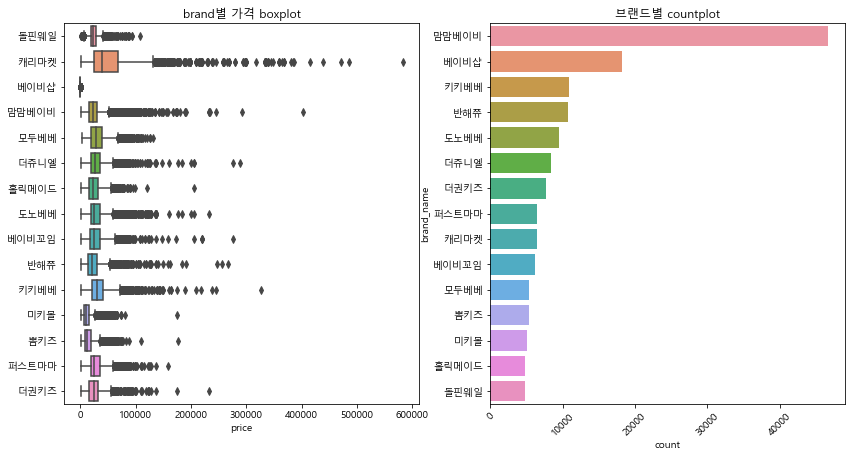

In [70]:
f, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(x = main_brand_data['price'], y=main_brand_data['brand_name'], ax=ax[0])
ax[0].set_title('brand별 가격 boxplot');
ax[0].set_ylabel('');


sns.countplot(y= data['brand_name'], 
              order=data['brand_name'].value_counts().head(15).index, ax=ax[1])
plt.xticks(rotation=45)
ax[1].set_title('브랜드별 countplot');

- 상위 15개 brand의 price시각화
- 캐리마켓(빈도수 9위)이 특히 비싼 상품 많다
- 베이비샵(빈도수 2위)은 대부분 저렴
- 빈도수 제일 많은 맘맘베이비는 비교적 저렴한 편에 속한다

# 3. Image 불러오기 및 저장

In [12]:
data['image_url'].values

array(['https://hohodangstore.co.kr/web/product/medium/20200422/3e7803ae7120a444ea3a0b014f973d4f.png',
       'https://hohodangstore.co.kr/web/product/medium/20200423/1dd0bc63eb27f0d10d6bbade3248f8c7.jpg',
       'https://hohodangstore.co.kr/web/product/medium/202012/37f3665114aa28397bd340fe7a2d0aba.jpg',
       ...,
       'https://shopping-phinf.pstatic.net/main_8365832/83658321350.jpg',
       'https://shopping-phinf.pstatic.net/main_8365829/83658296438.jpg',
       'https://www.soim.co.kr/shopimages/ebbda12/0680030031763.gif?1629185261'],
      dtype=object)

- 1차: 데이터 불러오기 및 저장

(1000, 1000, 3)

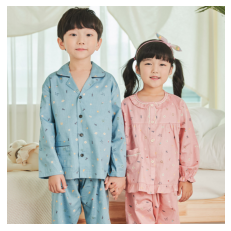

In [253]:
sample = random.choices(population=data['image_url'].values)
url = sample[0]
req = urllib.request.urlopen(url)

arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis(False); plt.imshow(img);
img.shape

In [ ]:
# augmentation 샘플 데이터 시각화(계속 변함)

plt.figure(figsize=(6,6))
for i in range(9):
    augmented_images = data_augmentation(img)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

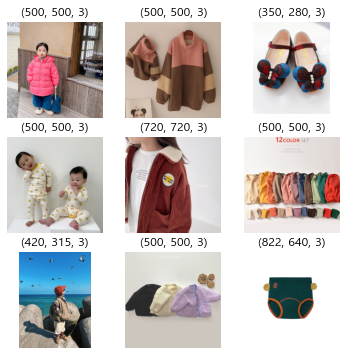

In [255]:
plt.figure(figsize=(6,6))
for i in range(9):
    sample = random.choices(population=data['image_url'].values)
    url = sample[0]                     
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    ax = plt.subplot(3, 3, i + 1)
    
    plt.title(img.shape);plt.axis(False); plt.imshow(img);

- 이미지의 형태 및 사이즈가 제각각

In [247]:
# COLOR조정하는데 있어서 에러나는 경우 존재
sample = random.choices(population=data['image_url'].values)
url = sample[0]
req = urllib.request.urlopen(url)

arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis(False); plt.imshow(img);

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


- 2차: 데이터 형태 crop 및 resize

(500, 750, 3)


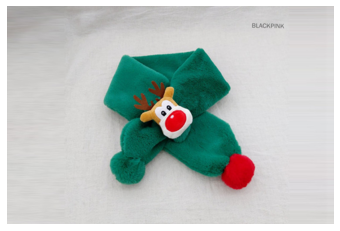

In [42]:
sample = random.choices(population=data['image_url'].values)
url = sample[0]
req = urllib.request.urlopen(url)

arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis(False); plt.imshow(img);
print(img.shape)

(400, 400, 3)

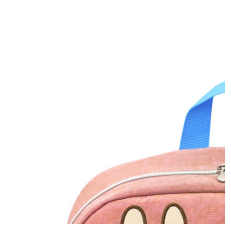

In [36]:
# crop
crop_img = img[100:500,100:500]#슬라이싱

plt.axis(False); plt.imshow(crop_img);
crop_img.shape

image size: (1500, 1500, 3) => (900, 900, 3)


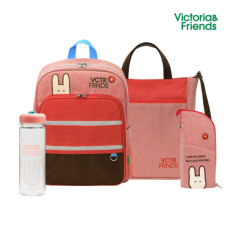

In [37]:
# resize
scaleX = 0.6
scaleY = 0.6
#resizing 코드
scaleDown = cv2.resize(img, None, fx=scaleX, fy=scaleY, interpolation = cv2.INTER_LINEAR)

plt.axis(False); plt.imshow(scaleDown);
print(f'image size: {img.shape} => {scaleDown.shape}')

(400, 400, 3)

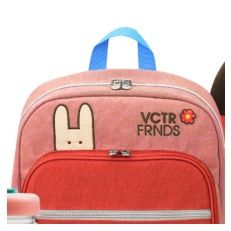

In [38]:
# resize and crop
sd_crop_img = scaleDown[100:500,100:500]#슬라이싱

plt.axis(False); plt.imshow(sd_crop_img);
sd_crop_img.shape

(500, 750, 3) (480, 640, 3) (250, 375, 3)


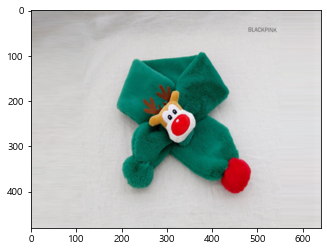

In [48]:
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dst = cv2.resize(img, dsize=(640, 480), interpolation=cv2.INTER_AREA) # 직접 조정
dst2 = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR) # 비율로 조정

#plt.axis(False); plt.imshow(img);
plt.imshow(dst)
print(img.shape, dst.shape, dst2.shape)


In [39]:
# 아미지 crop, resize하여 데이터 저장


cv2.imwrite("./data_image/test.jpg"  , scaleDown) 

True

- 3차 데이터 불러오기 및 사이즈 변환